In [972]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [973]:
import os
os.chdir("C:\\Users\\dalto\\Desktop\\Estágio\\Data Science")

dol = pd.read_excel("PredDolarInv3.xlsx")
dol

,Data,Abertura,Máxima,Mínima,Fechamento,BollingerSup,BollingerInf
0,2014-01-02,3841.71,3895.47,3841.71,3860.16,3885.81,3737.85
1,2014-01-03,3846.52,3860.97,3828.07,3842.51,3886.74,3737.68
2,2014-01-06,3835.29,3854.55,3832.08,3846.52,3884.99,3738.32
3,2014-01-07,3835.29,3840.10,3805.60,3832.88,3872.71,3744.58
4,2014-01-08,3838.50,3872.20,3823.25,3869.79,3878.76,3741.86
...,...,...,...,...,...,...,...
1890,2021-08-24,5370.00,5370.50,5251.00,5257.00,5426.34,5098.23
1891,2021-08-25,5270.00,5275.00,5210.00,5217.50,5422.00,5110.25
1892,2021-08-26,5226.00,5270.50,5220.50,5269.50,5410.59,5138.61
1893,2021-08-27,5257.00,5263.50,5189.50,5203.00,5411.53,5134.67


In [974]:
per=1
dol["Alvo"] = np.where(dol["Fechamento"].shift(-1) > dol["Fechamento"] , 'Alta', 'Baixa')

dol["Retorno"] = dol["Fechamento"].pct_change(per)
dol["Retorno-1"] = dol["Retorno"].shift(1)
dol["Retorno-2"] = dol["Retorno-1"].shift(1)
dol["Retorno-3"] = dol["Retorno-2"].shift(1) 
dol["Retorno-4"] = dol["Retorno-3"].shift(1)
dol["Retorno-5"] = dol["Retorno-4"].shift(1)
#dol["Retorno-6"] = dol["Retorno-5"].shift(1)
#dol["Retorno-7"] = dol["Retorno-6"].shift(1)
#dol["Retorno-8"] = dol["Retorno-7"].shift(1) 
#dol["Retorno-9"] = dol["Retorno-8"].shift(1)
#dol["Retorno-10"] = dol["Retorno-9"].shift(1) 

dol["DistBoll"] = (dol["BollingerSup"] - dol["BollingerInf"])
dol["MMDistBoll10"] = dol["DistBoll"].rolling(10).mean()
#dol["MMDistBoll10"] = pd.qcut(dol["MMDistBoll10"], 10, labels = False)+1
dol["DistBoll-1"] = dol["DistBoll"].shift(1)
dol["DistBoll-2"] = dol["DistBoll"].shift(2)
dol["DistBoll-3"] = dol["DistBoll"].shift(3)
dol["DistBoll-4"] = dol["DistBoll"].shift(4)
dol["DistBoll-5"] = dol["DistBoll"].shift(5)
#dol["DistBoll-6"] = dol["DistBoll"].shift(6)
#dol["DistBoll-7"] = dol["DistBoll"].shift(7)
#dol["DistBoll-8"] = dol["DistBoll"].shift(8)
#dol["DistBoll-9"] = dol["DistBoll"].shift(9)
#dol["DistBoll-10"] = dol["DistBoll"].shift(10)

# Desvio Padrão
dol["std5"] = dol["Fechamento"].rolling(5).std()
dol["std10"] = dol["Fechamento"].rolling(10).std()
dol["std15"] = dol["Fechamento"].rolling(15).std()

# Proporção do corpo do candle em relação ao range do dia
dol["prop"] = (dol["Fechamento"]-dol["Abertura"])/(dol["Máxima"]-dol["Mínima"])
#dol["prop"] = pd.qcut(dol["prop"], 10, labels = False)
dol["prop-1"] = dol["prop"].shift(1)
dol["prop-2"] = dol["prop"].shift(2)
dol["prop-3"] = dol["prop"].shift(3)
dol["prop-4"] = dol["prop"].shift(4)
dol["prop-5"] = dol["prop"].shift(5)
#dol["prop-6"] = dol["prop"].shift(6)
#dol["prop-7"] = dol["prop"].shift(7)
#dol["prop-8"] = dol["prop"].shift(8)
#dol["prop-9"] = dol["prop"].shift(9)
#dol["prop-10"] = dol["prop"].shift(10)

# Direção do dia atual
dol["dirD"] = np.where(dol["Fechamento"] > dol["Abertura"], 1, 0)
dol["dirD-1"] = dol["dirD"].shift(1)
dol["dirD-2"] = dol["dirD"].shift(2)
dol["dirD-3"] = dol["dirD"].shift(3)
dol["dirD-4"] = dol["dirD"].shift(4)
dol["dirD-5"] = dol["dirD"].shift(5)
#dol["dirD-6"] = dol["dirD"].shift(6)
#dol["dirD-7"] = dol["dirD"].shift(7)
#dol["dirD-8"] = dol["dirD"].shift(8)
#dol["dirD-9"] = dol["dirD"].shift(9)
#dol["dirD-10"] = dol["dirD"].shift(10)

# Média móvel de 15 dias
dol["MM"] = dol["Fechamento"].rolling(15).mean()
# Zscore
dol["zscore"] = (dol["Fechamento"]-dol["MM"])/dol["std15"]
dol["zscore-1"] = dol["zscore"].shift(1)
dol["zscore-2"] = dol["zscore"].shift(2)
dol["zscore-3"] = dol["zscore"].shift(3)
dol["zscore-4"] = dol["zscore"].shift(4)
dol["zscore-5"] = dol["zscore"].shift(5)
#dol["zscore-6"] = dol["zscore"].shift(6)
#dol["zscore-7"] = dol["zscore"].shift(7)
#dol["zscore-8"] = dol["zscore"].shift(8)
#dol["zscore-9"] = dol["zscore"].shift(9)
#dol["zscore-10"] = dol["zscore"].shift(10)

# RSL
dol["RSL"] = (dol["Fechamento"]/dol["MM"])-1
dol["RSL-1"] = dol["RSL"].shift(1)
dol["RSL-2"] = dol["RSL"].shift(2)
dol["RSL-3"] = dol["RSL"].shift(3)
dol["RSL-4"] = dol["RSL"].shift(4)
dol["RSL-5"] = dol["RSL"].shift(5)
#dol["RSL-6"] = dol["RSL"].shift(6)
#dol["RSL-7"] = dol["RSL"].shift(7)
#dol["RSL-8"] = dol["RSL"].shift(8)
#dol["RSL-9"] = dol["RSL"].shift(9)
#dol["RSL-10"] = dol["RSL"].shift(10)

#dol["Pips"] = (dol["Fechamento"].shift(1) - dol["Fechamento"])
#dol["Pips-1"] = dol["Pips"].shift(1)
#dol["Pips-2"] = dol["Pips"].shift(2)
#dol["Pips-3"] = dol["Pips"].shift(3)


#dol["std5"] = pd.qcut(dol["std5"], 10, labels = False)
#dol["std10"] = pd.qcut(dol["std10"], 10, labels = False)
#dol["std15"] = pd.qcut(dol["std15"], 10, labels = False)


In [975]:
dol["MMDistBoll15"] = dol["DistBoll"].rolling(15).mean()
dol["std5"] = pd.qcut(dol["std5"], 10, labels = False)
dol["std15"] = pd.qcut(dol["std15"], 10, labels = False)
dol["DistBoll"] = pd.qcut(dol["DistBoll"], 10, labels = False)
dol["prop"] = pd.qcut(dol["prop"], 10, labels = False)
dol["MMDistBoll15"] = pd.qcut(dol["MMDistBoll15"], 10, labels = False)

In [976]:
#dol.hist()
#plt.gcf().set_size_inches(20,10)

In [977]:
dol.head(10)

,Data,Abertura,Máxima,Mínima,Fechamento,BollingerSup,BollingerInf,Alvo,Retorno,Retorno-1,...,zscore-3,zscore-4,zscore-5,RSL,RSL-1,RSL-2,RSL-3,RSL-4,RSL-5,MMDistBoll15
0,2014-01-02,3841.71,3895.47,3841.71,3860.16,3885.81,3737.85,Baixa,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-01-03,3846.52,3860.97,3828.07,3842.51,3886.74,3737.68,Alta,-0.004572,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-01-06,3835.29,3854.55,3832.08,3846.52,3884.99,3738.32,Baixa,0.001044,-0.004572,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-01-07,3835.29,3840.10,3805.60,3832.88,3872.71,3744.58,Alta,-0.003546,0.001044,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-01-08,3838.50,3872.20,3823.25,3869.79,3878.76,3741.86,Baixa,0.009630,-0.003546,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2014-01-09,3866.58,3880.22,3857.76,3859.36,3884.79,3742.41,Baixa,-0.002695,0.009630,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2014-01-10,3853.74,3868.99,3804.00,3808.81,3883.94,3747.12,Baixa,-0.013098,-0.002695,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2014-01-13,3812.82,3812.82,3773.51,3803.20,3880.15,3756.15,Baixa,-0.001473,-0.013098,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2014-01-14,3811.22,3819.24,3787.15,3790.36,3880.35,3754.41,Alta,-0.003376,-0.001473,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2014-01-15,3795.17,3805.60,3774.31,3804.80,3880.25,3755.63,Baixa,0.003810,-0.003376,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [978]:
dol = dol.drop(["Abertura", "Mínima", "Máxima", "BollingerSup", "BollingerInf", "MM"], axis = 1)
#"std5", "std15",

In [979]:
dol = dol.fillna(method = "ffill")
dol = dol.dropna(axis=0)
dol.isna().sum().sum()

0

In [980]:
dol["Data"] = pd.to_datetime(dol["Data"]).dt.normalize()
dol = dol.set_index("Data")
dol.head()

,Fechamento,Alvo,Retorno,Retorno-1,Retorno-2,Retorno-3,Retorno-4,Retorno-5,DistBoll,MMDistBoll10,...,zscore-3,zscore-4,zscore-5,RSL,RSL-1,RSL-2,RSL-3,RSL-4,RSL-5,MMDistBoll15
Data,,,,,,,,,,,,,,,,,,,,,
2014-01-29,3914.72,Baixa,0.005980,-0.001032,0.009566,-0.000414,0.010714,0.005066,2,127.006,...,1.190162,1.319251,-0.001808,0.021979,0.016699,0.018789,0.009997,0.010699,-0.000015,0.0
2014-01-30,3868.99,Alta,-0.011682,0.005980,-0.001032,0.009566,-0.000414,0.010714,2,130.851,...,1.939168,1.190162,1.319251,0.009871,0.021979,0.016699,0.018789,0.009997,0.010699,0.0
2014-01-31,3871.38,Alta,0.000618,-0.011682,0.005980,-0.001032,0.009566,-0.000414,2,134.773,...,1.560046,1.939168,1.190162,0.009396,0.009871,0.021979,0.016699,0.018789,0.009997,1.0
2014-02-03,3912.76,Baixa,0.010689,0.000618,-0.011682,0.005980,-0.001032,0.009566,2,140.281,...,1.844056,1.560046,1.939168,0.018246,0.009396,0.009871,0.021979,0.016699,0.018789,1.0
2014-02-04,3855.46,Baixa,-0.014644,0.010689,0.000618,-0.011682,0.005980,-0.001032,2,146.136,...,0.819393,1.844056,1.560046,0.002203,0.018246,0.009396,0.009871,0.021979,0.016699,1.0


In [1003]:
### Separando os dados entre treinamento e teste
# Como estamos treinando um modelo com base temporal vamos separar a mão os períodos

sTrain = "2014-02-12"
eTrain = "2017-12-31"
# Teste de 2020.2 até agora 
sTest = "2018-01-01"
eTest = "2021-08-30"


dolTrain = dol[sTrain : eTrain]
dolTest = dol[sTest : eTest]
print(dolTrain.shape)
print(dolTest.shape)


(960, 43)
(906, 43)


In [1004]:
xTrain = dolTrain.drop("Alvo", axis = 1)
yTrain = dolTrain["Alvo"]

xTest = dolTest.drop("Alvo", axis = 1)
yTest = dolTest["Alvo"]

In [1005]:
from sklearn.tree import DecisionTreeClassifier

modTree = DecisionTreeClassifier(random_state=42)

modTree.fit(xTrain, yTrain)

DecisionTreeClassifier(random_state=42)

In [1006]:
predTrain = modTree.predict(xTrain)
predTest = modTree.predict(xTest)


In [1007]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(yTest, predTest))
print()
print("------------------------------------------------")
print()
print(classification_report(yTest,predTest))
import sklearn.metrics as metrics

print("Acurácia: ", round(metrics.accuracy_score(yTest, predTest)*100,3))

[[242 240]
 [191 233]]

------------------------------------------------

              precision    recall  f1-score   support

        Alta       0.56      0.50      0.53       482
       Baixa       0.49      0.55      0.52       424

    accuracy                           0.52       906
   macro avg       0.53      0.53      0.52       906
weighted avg       0.53      0.52      0.52       906

Acurácia:  52.428


In [1008]:
os.environ["PATH"] += os.pathsep + 'C:\Program Files (x86)\Graphviz2.38\bin'

In [1009]:
#from six import StringIO #from sklearn.externals.six import StringIO
#from IPython.display import Image
#from sklearn.tree import export_graphviz
#import pydotplus

#dot_data = StringIO()

#export_graphviz(modTree
#                , out_file = dot_data
#                , filled = True
#                , rounded = True
#                , special_characters = True
#                , feature_names = xTrain.columns
#                , class_names = ['Baixa', 'Alta'])

#graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

#graph.write_png('arvore3.png')

#Image(graph.create_png())

In [1010]:
dolTest.loc[:,"Previsto"] = predTest
dolTest["Previsto"].value_counts(normalize=True)*100

C:\Users\dalto\anaconda3\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\dalto\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Baixa    52.207506
Alta     47.792494
Name: Previsto, dtype: float64

In [1011]:
#dolTest["Previsto"].astype(str)

dolTest["Previsto"].tail(11)

Data
2021-08-16    Baixa
2021-08-17    Baixa
2021-08-18     Alta
2021-08-19    Baixa
2021-08-20     Alta
2021-08-23     Alta
2021-08-24    Baixa
2021-08-25     Alta
2021-08-26     Alta
2021-08-27     Alta
2021-08-30     Alta
Name: Previsto, dtype: object

In [1012]:
dolTest["Alvo"].tail(11)

Data
2021-08-16     Alta
2021-08-17     Alta
2021-08-18     Alta
2021-08-19    Baixa
2021-08-20     Alta
2021-08-23    Baixa
2021-08-24    Baixa
2021-08-25     Alta
2021-08-26    Baixa
2021-08-27    Baixa
2021-08-30    Baixa
Name: Alvo, dtype: object

In [1013]:
# ajustando o retorno em pips com o resultado do modelo

# variação em Pips
dolTest["Pips"] = (dolTest["Fechamento"].shift(1) - dolTest["Fechamento"])
dolTest.loc[:, "RetPips"] = np.where(dolTest.loc[:,"Previsto"] == "Alta", dolTest.loc[:,'Pips'], '0')
dolTest.loc[:, "RetPips"] = np.where(dolTest.loc[:,"Previsto"] == "Baixa", -1*dolTest.loc[:,'Pips'], dolTest.loc[:,"RetPips"])

<ipython-input-1013-deaf57951915>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dolTest["Pips"] = (dolTest["Fechamento"].shift(1) - dolTest["Fechamento"])


In [1014]:
dolTest.loc[:, "RetPips"] =  dolTest["RetPips"].astype(float)
dolTest.loc[:, "RetPipsAcumulado"] = dolTest["RetPips"].cumsum()
dolTest.loc[:,"RetPipsAcumulado"].tail()

Data
2021-08-24    4944.21
2021-08-25    4983.71
2021-08-26    4931.71
2021-08-27    4998.21
2021-08-30    5015.71
Name: RetPipsAcumulado, dtype: float64

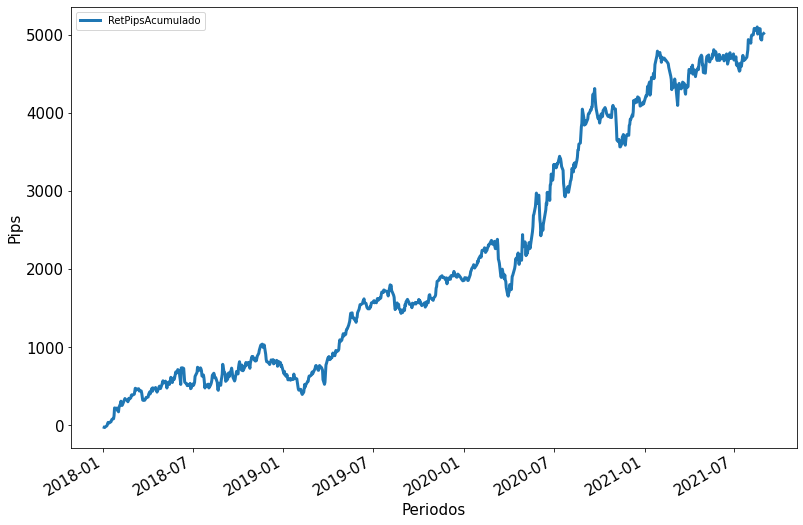

In [1015]:
dolTest["RetPipsAcumulado"].plot(figsize = (13,9)
                              ,linewidth = 3
                              ,fontsize = 15)
plt.xlabel('Periodos'
          , fontsize = 15)
plt.ylabel('Pips'
          , fontsize = 15)
plt.legend();

# Passo 9 - Aperfeiçoamento do modelo

In [1058]:
from sklearn.tree import DecisionTreeClassifier

modTree = DecisionTreeClassifier(criterion = "gini", random_state = 42, max_depth = 15) #19

modTree.fit(xTrain,yTrain)

DecisionTreeClassifier(max_depth=15, random_state=42)

In [1059]:
predTest = modTree.predict(xTest)

In [1060]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(yTest, predTest))
print()
print("------------------------------------------------")
print()
print(classification_report(yTest,predTest))
import sklearn.metrics as metrics

print("Acurácia: ", round(metrics.accuracy_score(yTest, predTest)*100,3))

[[258 224]
 [188 236]]

------------------------------------------------

              precision    recall  f1-score   support

        Alta       0.58      0.54      0.56       482
       Baixa       0.51      0.56      0.53       424

    accuracy                           0.55       906
   macro avg       0.55      0.55      0.54       906
weighted avg       0.55      0.55      0.55       906

Acurácia:  54.525


In [1019]:
#os.environ["PATH"] += os.pathsep + 'C:\Program Files (x86)\Graphviz2.38\bin'
#from six import StringIO #from sklearn.externals.six import StringIO
#from IPython.display import Image
#from sklearn.tree import export_graphviz
#import pydotplus

#dot_data = StringIO()

#export_graphviz(modTree
#                , out_file = dot_data
#                , filled = True
#                , rounded = True
#                , special_characters = True
#                , feature_names = xTrain.columns
#                , class_names = ['Baixa', 'Alta'])
#
#graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
#
#graph.write_png('Narvore3.png')
#
#Image(graph.create_png())

In [1020]:
#dolTest["Previsto"].astype(str)
dolTest["Previsto"].tail(11)

Data
2021-08-16    Baixa
2021-08-17    Baixa
2021-08-18     Alta
2021-08-19    Baixa
2021-08-20     Alta
2021-08-23     Alta
2021-08-24    Baixa
2021-08-25     Alta
2021-08-26     Alta
2021-08-27     Alta
2021-08-30     Alta
Name: Previsto, dtype: object

In [1021]:
dolTest["Alvo"].tail(11)

Data
2021-08-16     Alta
2021-08-17     Alta
2021-08-18     Alta
2021-08-19    Baixa
2021-08-20     Alta
2021-08-23    Baixa
2021-08-24    Baixa
2021-08-25     Alta
2021-08-26    Baixa
2021-08-27    Baixa
2021-08-30    Baixa
Name: Alvo, dtype: object

In [1000]:
# ajustando o retorno em pips com o resultado do modelo

dolTest.loc[:, "RetPips"] = np.where(dolTest.loc[:,"Previsto"] == "Alta", dolTest.loc[:,'Pips'], '0')
dolTest.loc[:, "RetPips"] = np.where(dolTest.loc[:,"Previsto"] == "Baixa", -1*dolTest.loc[:,'Pips'], dolTest.loc[:,"RetPips"])
dolTest.loc[:, "RetPips"] =  dolTest["RetPips"].astype(float)
dolTest.loc[:, "RetPipsAcumulado"] = dolTest["RetPips"].cumsum()
dolTest.loc[:,"RetPipsAcumulado"].tail()

C:\Users\dalto\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Data
2021-08-19    5037.71
2021-08-20    5080.21
2021-08-23    5075.21
2021-08-24    4944.21
2021-08-25    4983.71
Name: RetPipsAcumulado, dtype: float64

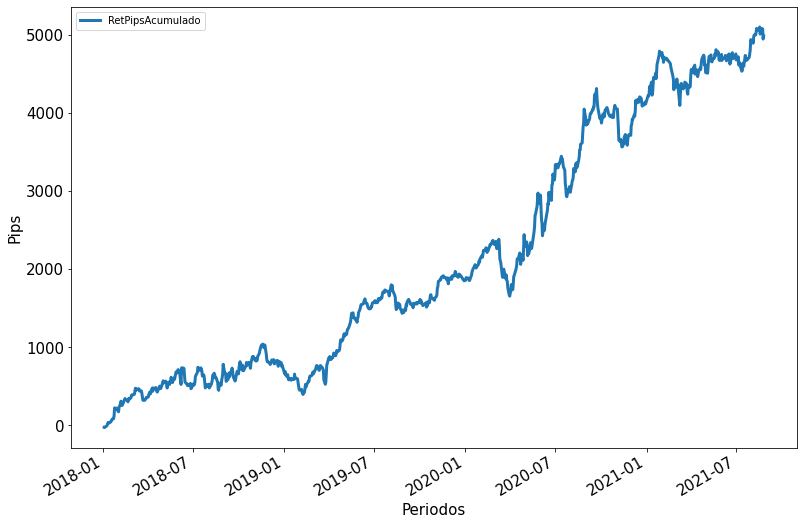

In [1001]:
dolTest["RetPipsAcumulado"].plot(figsize = (13,9)
                              ,linewidth = 3
                              ,fontsize = 15)
plt.xlabel('Periodos'
          , fontsize = 15)
plt.ylabel('Pips'
          , fontsize = 15)
plt.legend();

In [1002]:
# EXPORTANDO A BASE DE DADOS

#dfTest.to_csv("resultados_arvore.csv", index = True, header = True)

In [ ]:
dol.tail(3)

In [ ]:
hoje = pd.Series( data = {"Abertura": 1.119, "Máxima" : 1.1200, "Mínima" : 1.155, "Fechamento" : 1.16}, name = "2021-08-16")

dol = dol.append(hoje, ignore_index = False)

df.tail(3)